# A mchine learning project on **Heart Disease Prediction**

## This is my **3rd semester** final machine learning project on _Heart Disease classification_

Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


### Attributes
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
  number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
data = pd.read_csv(r'/kaggle/input/heart-disease-dataset/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

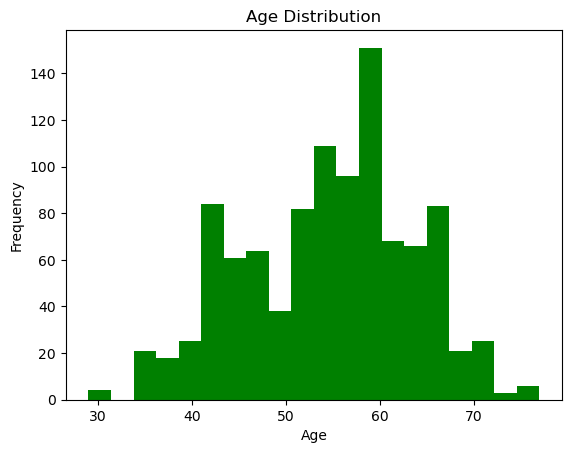

In [9]:
import matplotlib.pyplot as plt
plt.hist(data['age'], bins=20, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


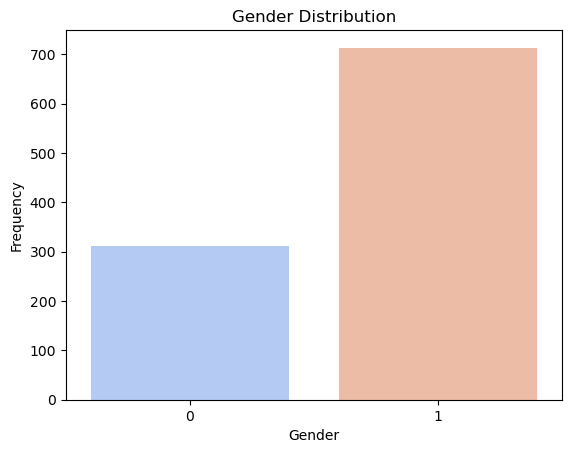

In [10]:
import seaborn as sns
sns.countplot(x='sex', data=data, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')
plt.show()


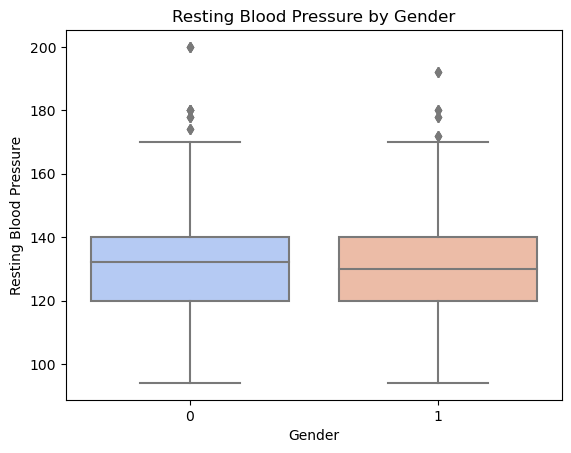

In [11]:
sns.boxplot(x='sex', y='trestbps', data=data, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure by Gender')
plt.show()


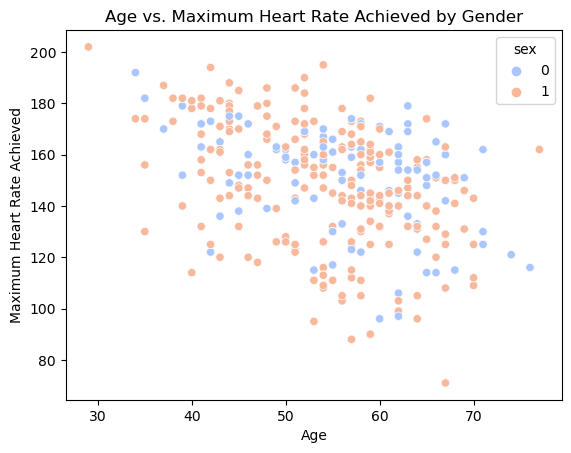

In [12]:
sns.scatterplot(x='age', y='thalach', hue='sex', data=data, palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Age vs. Maximum Heart Rate Achieved by Gender')
plt.show()


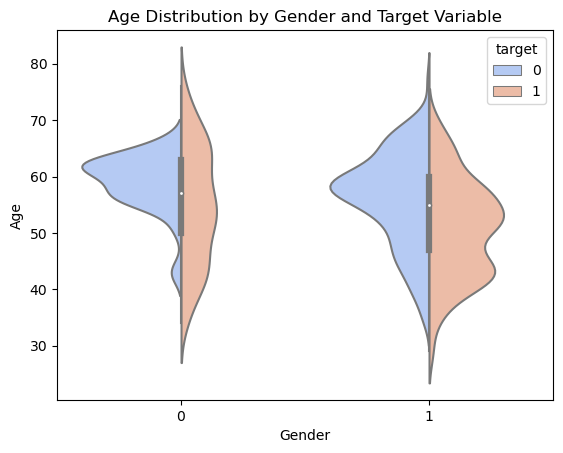

In [13]:
sns.violinplot(x='sex', y='age', hue='target', data=data, split=True, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender and Target Variable')
plt.show()


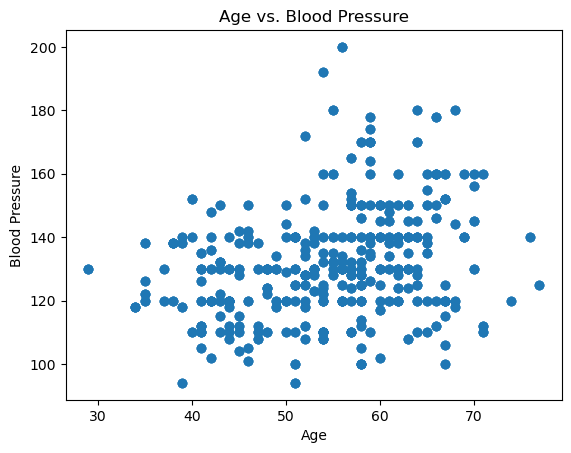

In [14]:
# Create a scatter plot of age vs. blood pressure
plt.scatter(data["age"], data["trestbps"])

# Add a title and labels to the plot
plt.title("Age vs. Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")

# Show the plot
plt.show()


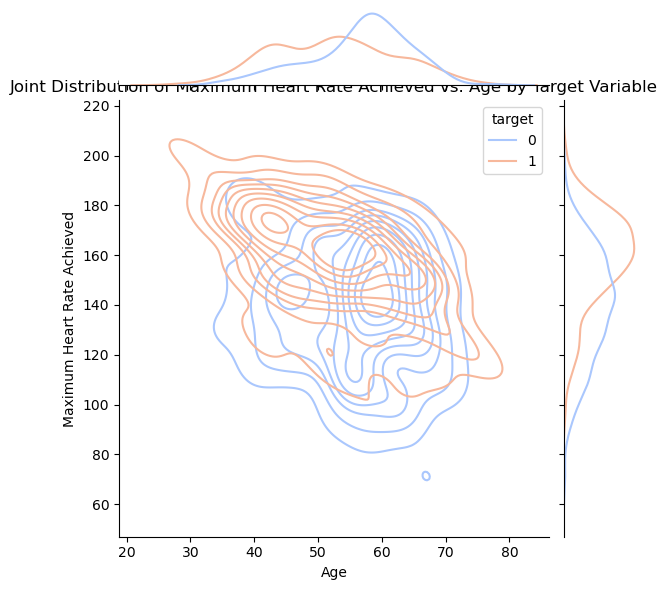

In [15]:
sns.jointplot(x='age', y='thalach', data=data, kind='kde', hue='target', palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Joint Distribution of Maximum Heart Rate Achieved vs. Age by Target Variable')
plt.show()


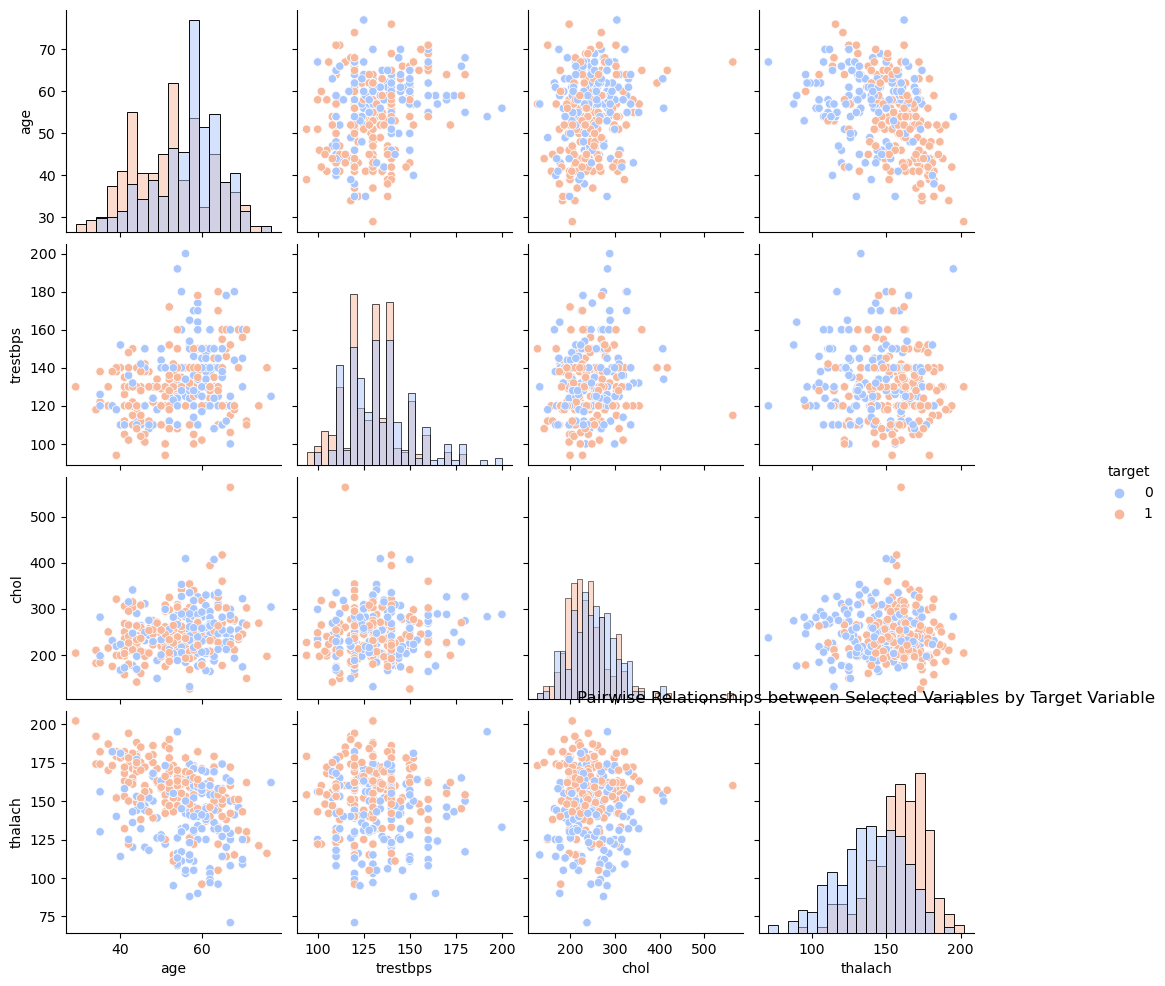

In [16]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', diag_kind='hist', palette='coolwarm')
plt.title('Pairwise Relationships between Selected Variables by Target Variable')
plt.show()


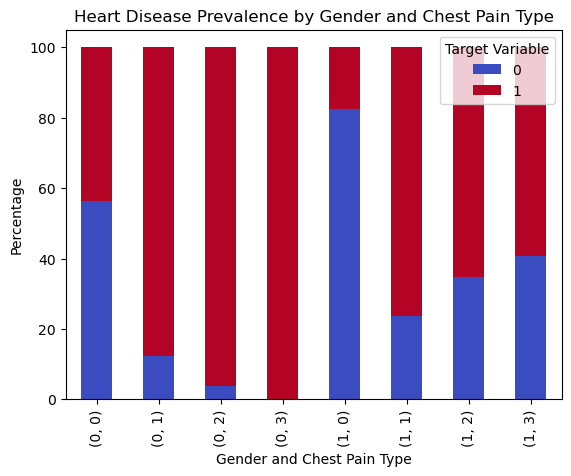

In [17]:
data_cp = data.groupby(['sex', 'cp', 'target'])['target'].count().unstack('target').fillna(0)
data_cp['total'] = data_cp[0] + data_cp[1]
data_cp_pct = data_cp.div(data_cp['total'], axis=0).multiply(100).drop(columns='total')
data_cp_pct.plot(kind='bar', stacked=True, cmap='coolwarm')
plt.xlabel('Gender and Chest Pain Type')
plt.ylabel('Percentage')
plt.title('Heart Disease Prevalence by Gender and Chest Pain Type')
plt.legend(title='Target Variable', loc='upper right')
plt.show()


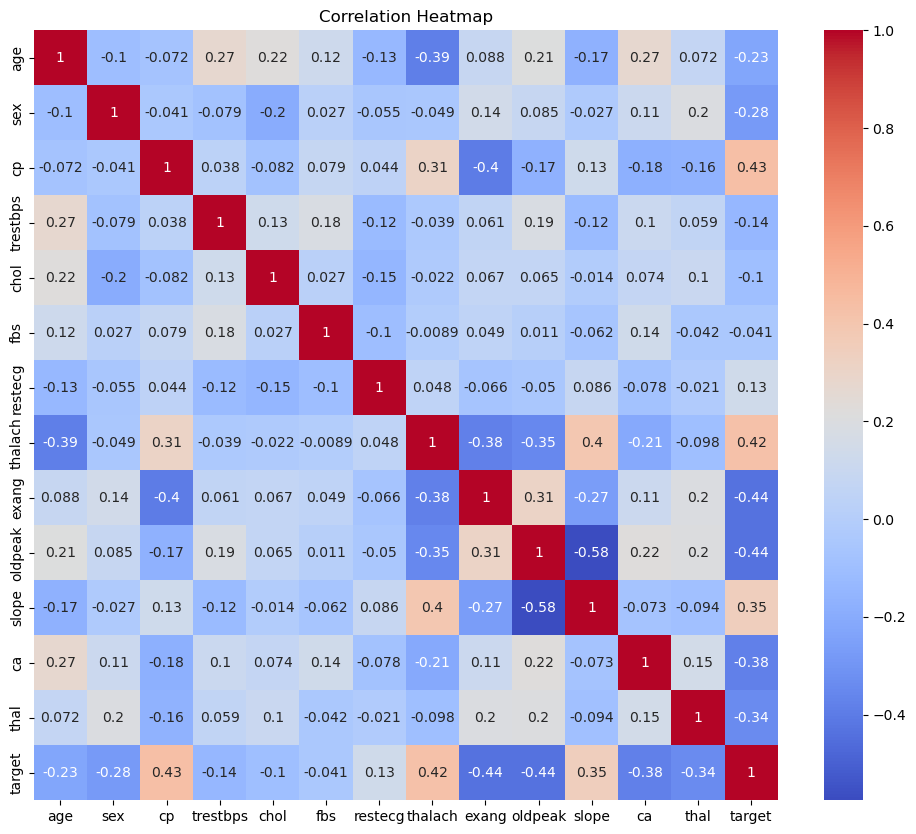

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, ax=ax)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
# Define a function to detect outliers using the z-score method
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers in a pandas dataframe using the z-score method.
    """
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold


I will be finding out the **outliers** for

1. _Age_
2. _Cholesterol_
3. _Resting Blood Pressure_
4. _Fasting Blood Sugar_
5. _ST depression_
6. _Maximum Heart Rate_


And will be aiming to remove them

In [20]:
# Apply the outlier detection function to the age column
outliers_age = detect_outliers_zscore(data['age'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_age.sum()}")

Number of age outliers: 0


In [21]:
import matplotlib.pyplot as plt

In [22]:
# Apply the outlier detection function to the chol column
outliers_chol = detect_outliers_zscore(data['chol'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_chol.sum()}")

Number of age outliers: 13


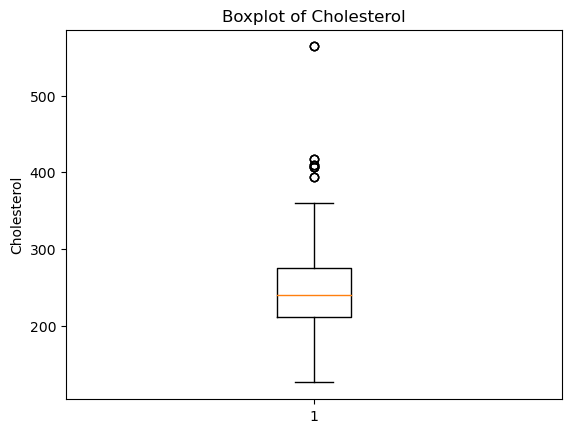

In [23]:
# Create a boxplot of the "Cholesterol" column
plt.boxplot(data['chol'])
plt.title('Boxplot of Cholesterol')
plt.ylabel('Cholesterol')
plt.show()

In [24]:
# Apply the outlier detection function to the Resting Blood Pressure column
outliers_restbp = detect_outliers_zscore(data['trestbps'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_restbp.sum()}")

Number of age outliers: 7


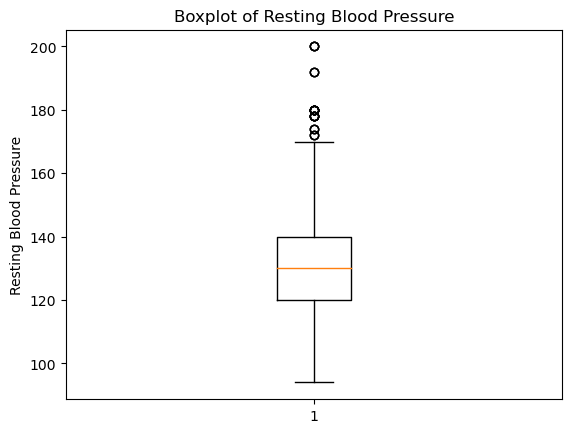

In [25]:
# Create a boxplot of the "resting BP" column
plt.boxplot(data['trestbps'])
plt.title('Boxplot of Resting Blood Pressure')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [26]:
# Apply the outlier detection function to the age column
outliers_blood_sugar = detect_outliers_zscore(data['fbs'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_blood_sugar.sum()}")

Number of age outliers: 0


In [27]:
# Apply the outlier detection function to the age column
outliers_St_depression = detect_outliers_zscore(data['oldpeak'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_St_depression.sum()}")

Number of age outliers: 7


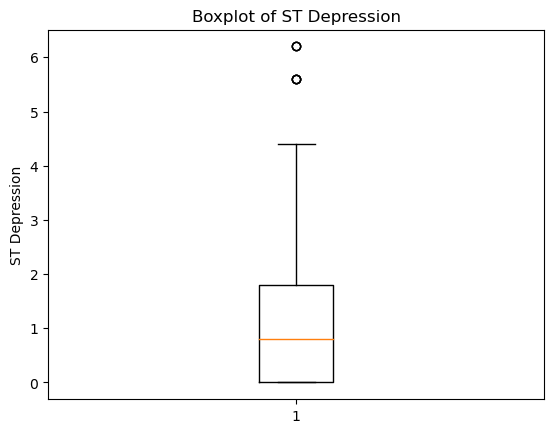

In [28]:
# Create a boxplot of the "ST depression" column
plt.boxplot(data['oldpeak'])
plt.title('Boxplot of ST Depression')
plt.ylabel('ST Depression')
plt.show()

In [29]:
# Apply the outlier detection function to the thalach column
outliers_max_heartrate = detect_outliers_zscore(data['thalach'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_max_heartrate.sum()}")

Number of age outliers: 4


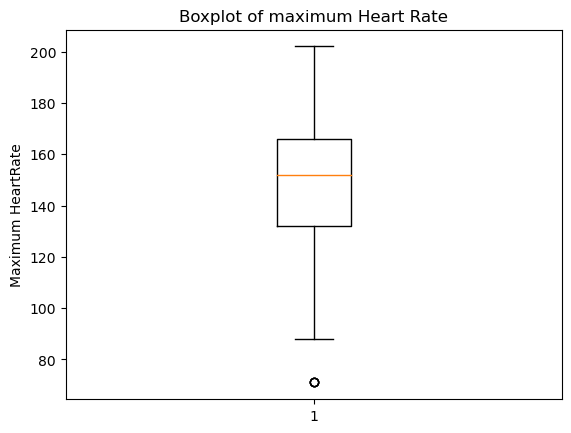

In [30]:
# Create a boxplot of the "thalach" column
plt.boxplot(data['thalach'])
plt.title('Boxplot of maximum Heart Rate')
plt.ylabel('Maximum HeartRate')
plt.show()

Outliers are present in
- Cholesterol
- Resting Blood Pressure
- ST depression
- Maximum HeartRate

In [31]:
from scipy import stats
import pandas as pd
import numpy as np

# Load the dataset
data_outlier = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

# Calculate the z-score for each data point in the "Cholesterol" column
z_scores = stats.zscore(data_outlier['chol'])

# Define a threshold for outliers (e.g., 3 standard deviations away from the mean)
threshold = 2.5

# Find the data points that have a z-score beyond the threshold
outliers_cholesterol = np.where(np.abs(z_scores) > threshold)

# Remove the outliers from the dataset
data_outlier = data_outlier.drop(outliers_cholesterol[0])


In [32]:
# Apply the outlier detection function to the age column
outliers_chol = detect_outliers_zscore(data['chol'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_chol.sum()}")

Number of age outliers: 13


In [33]:
# Apply the outlier detection function to the age column
outliers_chol = detect_outliers_zscore(data_outlier['chol'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_chol.sum()}")

Number of age outliers: 0


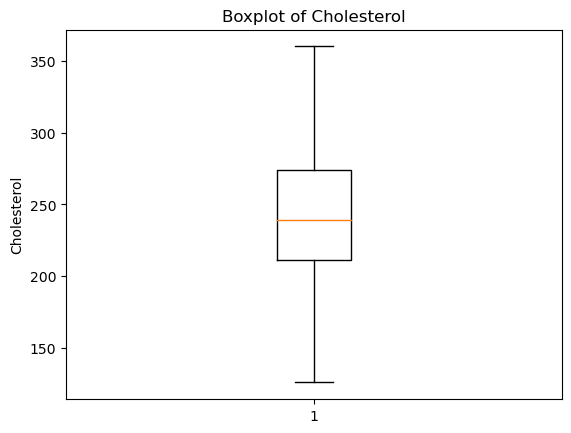

In [34]:
# Create a boxplot of the "chol" column in the rmoved outlier part
plt.boxplot(data_outlier['chol'])
plt.title('Boxplot of Cholesterol')
plt.ylabel('Cholesterol')
plt.show()

I used the threshold value as 3 while searching for the outliers where as i have to use the threshold value of 2.5 whole removing them

In [35]:
# Calculate the IQR for the "Resting Blood Pressure" column
q1 = data_outlier['trestbps'].quantile(0.25)
q3 = data_outlier['trestbps'].quantile(0.75)
iqr = q3 - q1

# Define a range for outliers (e.g., 1.5 times the IQR below the 25th percentile or above the 75th percentile)
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Find the data points that fall outside the range
outliers = data_outlier[(data_outlier['trestbps'] < lower_bound) | (data_outlier['trestbps'] > upper_bound)]

# Remove the outliers from the dataset
data_outlier = data_outlier.drop(outliers.index)


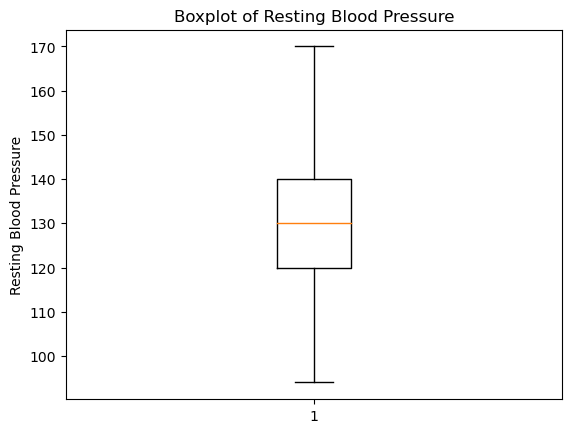

In [36]:
# Create a boxplot of the "chol" column in the rmoved outlier part
plt.boxplot(data_outlier['trestbps'])
plt.title('Boxplot of Resting Blood Pressure')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [37]:
print('Proportion of individuals with heart disease:', round(data['target'].mean(), 2))


Proportion of individuals with heart disease: 0.51


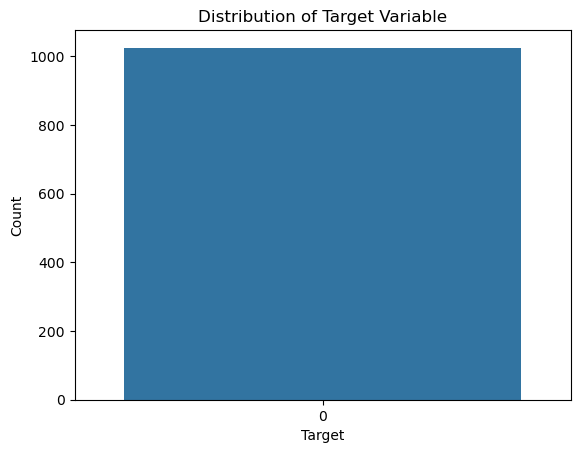

In [38]:
sns.countplot(data['target'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


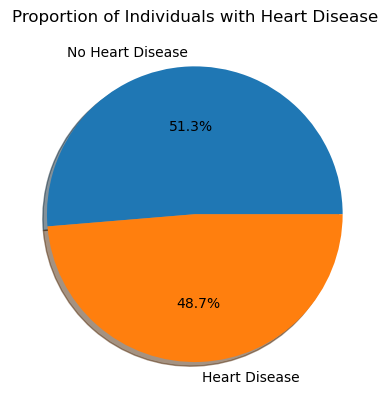

In [39]:
values = data['target'].value_counts().values
labels = ['No Heart Disease', 'Heart Disease']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Proportion of Individuals with Heart Disease')
plt.show()


## Now stsarting with creating the model

using the sklearn model

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['cp'] = encoder.fit_transform(data['cp'])
data['fbs'] = encoder.fit_transform(data['fbs'])
data['restecg'] = encoder.fit_transform(data['restecg'])
data['exang'] = encoder.fit_transform(data['exang'])
data['slope'] = encoder.fit_transform(data['slope'])
data['ca'] = encoder.fit_transform(data['ca'])
data['thal'] = encoder.fit_transform(data['thal'])


In [41]:
from sklearn.preprocessing import StandardScaler

# Scale numerical variables
scaler = StandardScaler()
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])


In [42]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


Accuracy: 0.8051948051948052
Precision: 0.7633136094674556
Recall: 0.8657718120805369
F1-score: 0.8113207547169812


## Using the famous model algorithms

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(random_state=42)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    print()


LogisticRegression
Accuracy: 0.8051948051948052
Precision: 0.7633136094674556
Recall: 0.8657718120805369
F1-score: 0.8113207547169812

DecisionTreeClassifier
Accuracy: 0.9707792207792207
Precision: 1.0
Recall: 0.9395973154362416
F1-score: 0.9688581314878892

RandomForestClassifier
Accuracy: 0.9805194805194806
Precision: 1.0
Recall: 0.959731543624161
F1-score: 0.9794520547945206

SVC
Accuracy: 0.8603896103896104
Precision: 0.8081395348837209
Recall: 0.9328859060402684
F1-score: 0.8660436137071651

KNeighborsClassifier
Accuracy: 0.8181818181818182
Precision: 0.7852760736196319
Recall: 0.8590604026845637
F1-score: 0.8205128205128205

GaussianNB
Accuracy: 0.814935064935065
Precision: 0.764367816091954
Recall: 0.8926174496644296
F1-score: 0.8235294117647058

GradientBoostingClassifier
Accuracy: 0.9512987012987013
Precision: 0.9466666666666667
Recall: 0.9530201342281879
F1-score: 0.9498327759197325



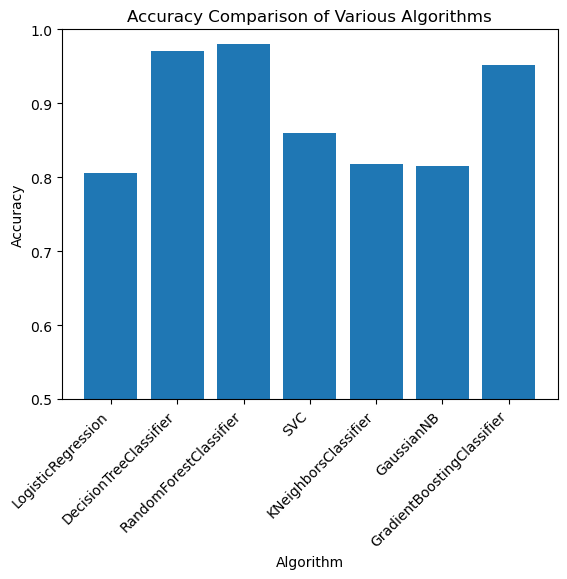

In [46]:
import matplotlib.pyplot as plt

# Train and evaluate each model
accuracies = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Create a bar chart
model_names = [type(model).__name__ for model in models]
plt.bar(model_names, accuracies)
plt.ylim([0.5, 1.0])
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy Comparison of Various Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()
